In [1]:
import pandas as pd
import yaml
import sqlite3
import numpy as np

In [45]:
orders_df = pd.read_csv("orders.csv")
customer_stats_df = pd.read_csv("customer_statistics.csv")

with open("customer_demographics.yaml", "r") as file:
    data = yaml.safe_load(file)

cd_df = pd.DataFrame.from_dict(data, orient="index")

In [3]:
#orders_df outliers
orders_df_outliers = orders_df[np.abs(orders_df['total'] - orders_df['total'].mean()) > 1.5 * orders_df['total'].std()]

#customer_stats_df
customer_stats_df_outliers = customer_stats_df[np.abs(customer_stats_df['total_orders'] - customer_stats_df['total_orders'].mean()) > 1.5 * customer_stats_df['total_orders'].std()]

#total items_outliers
total_items_outliers = customer_stats_df[np.abs(customer_stats_df['total_items'] - customer_stats_df['total_items'].mean()) > 1.5 * customer_stats_df['total_items'].std()]

#total spent_outliers
total_spent_outliers = customer_stats_df[np.abs(customer_stats_df['total_spent'] - customer_stats_df['total_spent'].mean()) > 1.5 * customer_stats_df['total_spent'].std()]


print(orders_df_outliers)
print(customer_stats_df_outliers)
print(total_items_outliers)
print(total_spent_outliers)

                                  order_id  customer_id  items   aperitifs  \
1     7b8a732e-85a0-4fa2-b282-a2d232ee182e         1756      3      Sherry   
7     5bbaa315-fb85-4301-b179-09f4859abd32         1314      4     Bellini   
19    69446b1b-1e63-4704-95ff-4ccaa3aa2b6f         9005      2        Port   
24    af19864a-b9f4-488a-a23c-fb5db7f377db         1295      2   Champagne   
26    ee98afbc-7fad-4b5b-992f-98de3b2c19e0          146      5   Americano   
...                                    ...          ...    ...         ...   
9928  82c32c26-05cd-4a14-aefa-5133f8f813ab         2334      5         Kir   
9969  001e3bd0-99ca-487c-a5aa-1ac7e58446db         7490      4      Sherry   
9977  8f9a1ee0-8ddd-49f2-825e-297d92699293         2690      7      Sherry   
9981  a38b43a4-1baa-4510-9889-5320a51f9990         5933     10  Kir Royale   
9998  8d611f13-8886-48a1-9805-30beeab154d9         5106      4    Vermouth   

        appetizers     entrees        desserts   total  
1     

In [4]:
orders_df.dropna(inplace=True)
orders_df.drop_duplicates(inplace=True)

cd_df.dropna(inplace=True, subset="customer_id")
cd_df.drop_duplicates(inplace=True, subset="customer_id")

In [5]:
merged = pd.merge(customer_stats_df, cd_df, left_index=True, right_index=True)

merged.drop_duplicates(inplace=True, subset="customer_id_x")
merged

customer_id_x  total_orders  total_items  total_spent  \
0              8037             5           20       300.39   
1              4290             2            3       332.66   
2              5367             3            7       643.27   
3              4755            10           12       649.12   
4              2651            10            9       794.28   
...             ...           ...          ...          ...   
9992           3678             9           16       910.24   
9993           2103             8           15       514.00   
9994           3559            10           11       418.79   
9998           3722             5            1       105.75   
9999           2911             2            8       918.60   

                            address             city credit_card_expires  \
0         621 Chavez Ramp Suite 938  West Deniseport               06/31   
1                   592 Mccoy River  Port Dannymouth               11/24   
2               8923 Aaron Turnpike   Port Rhondaton               11/31   
3               496 Margaret Shoals     Smithborough               04/33   
4        0807 Logan Fords Suite 355    Contrerasside               10/25   
...                             ...              ...                 ...   
9992           6194 Simmons Circles       East Brian               03/25   
9993               45292 Amy Stream     Martinezland               11/30   
9994    73248 Angela Plain Apt. 444   East Larryfort               04/25   
9998            35316 Becky Terrace      Port Donald               04/24   
9999  6101 Thompson Ridges Apt. 896     Marissamouth               05/25   

       credit_card_number         credit_card_provider  \
0        2269172571677458  Diners Club / Carte Blanche   
1            676320507830                 JCB 16 digit   
2     4607779976715144588                 JCB 16 digit   
3        4234465830748237                   Mastercard   
4           4985681645741                     Discover   
...                   ...                          ...   
9992        4338652993510                VISA 16 digit   
9993     4011981090951526                 JCB 16 digit   
9994         502023332864                VISA 16 digit   
9998     6595168672629675                 JCB 16 digit   
9999  4999092953838318200  Diners Club / Carte Blanche   

     credit_card_security_code                         customer_id_y  \
0                          338  a8c966a0-b670-4044-826c-0e6bfe708259   
1                          246  56b850e0-9320-4aa0-8cd4-d1199903c90e   
2                          869  5ec9f613-adb1-4e69-8a1a-9530cb777886   
3                          497  ca182662-b281-433a-a82b-8e061f7bf2cd   
4                          927  1e7c3a60-4788-4711-809f-b6f8bfbdb18a   
...                        ...                                   ...   
9992                       184  9be5b2d3-c3f1-4e83-8657-f24b9a4116cd   
9993                       849  12f10986-8ece-46d5-b853-1fcb7cbc270d   
9994                       002  352141f4-c26c-4973-9afd-2d1540f28bee   
9998                       113  7caf0251-8040-4c1e-8190-46133fde16ab   
9999                       810  3b343ad7-9d47-43c6-98d7-8a1c0bfebf12   

                              email                name  \
0               brett00@example.com      Ronald Rodgers   
1         smithjennifer@example.net       Mary Mitchell   
2                twhite@example.net        Nathan Wells   
3        nguyenjennifer@example.com         Kelly Ramos   
4          michaelabarr@example.net  Rebekah Fitzgerald   
...                             ...                 ...   
9992  brittneyrodriguez@example.net       Ruben Everett   
9993                           None    Gabrielle Carter   
9994     christianmoody@example.net         Lisa Rogers   
9998     andreawilliams@example.org         Karen Green   
9999        anthonykemp@example.net     Marissa Garrett   

               phone_number         state zip_code  
0           

In [6]:
all_merged_data = pd.merge(merged, orders_df, left_on='customer_id_x', right_on='customer_id')

In [46]:
#orders_df outliers
orders_df_outliers = orders_df[np.abs(orders_df['total'] - orders_df['total'].mean()) > 1.5 * orders_df['total'].std()]

#customer_stats_df
customer_stats_df_outliers = customer_stats_df[np.abs(customer_stats_df['total_orders'] - customer_stats_df['total_orders'].mean()) > 1.5 * customer_stats_df['total_orders'].std()]

#total items_outliers
total_items_outliers = customer_stats_df[np.abs(customer_stats_df['total_items'] - customer_stats_df['total_items'].mean()) > 1.5 * customer_stats_df['total_items'].std()]

#total spent_outliers
total_spent_outliers = customer_stats_df[np.abs(customer_stats_df['total_spent'] - customer_stats_df['total_spent'].mean()) > 1.5 * customer_stats_df['total_spent'].std()]


print(orders_df_outliers)
print(customer_stats_df_outliers)
print(total_items_outliers)
print(total_spent_outliers)

                                  order_id  customer_id  items   aperitifs  \
1     7b8a732e-85a0-4fa2-b282-a2d232ee182e         1756      3      Sherry   
7     5bbaa315-fb85-4301-b179-09f4859abd32         1314      4     Bellini   
19    69446b1b-1e63-4704-95ff-4ccaa3aa2b6f         9005      2        Port   
24    af19864a-b9f4-488a-a23c-fb5db7f377db         1295      2   Champagne   
26    ee98afbc-7fad-4b5b-992f-98de3b2c19e0          146      5   Americano   
...                                    ...          ...    ...         ...   
9928  82c32c26-05cd-4a14-aefa-5133f8f813ab         2334      5         Kir   
9969  001e3bd0-99ca-487c-a5aa-1ac7e58446db         7490      4      Sherry   
9977  8f9a1ee0-8ddd-49f2-825e-297d92699293         2690      7      Sherry   
9981  a38b43a4-1baa-4510-9889-5320a51f9990         5933     10  Kir Royale   
9998  8d611f13-8886-48a1-9805-30beeab154d9         5106      4    Vermouth   

        appetizers     entrees        desserts   total  
1     

## DATABASE STUFF

In [7]:
conn = sqlite3.connect("restaurant.db")

cursor = conn.cursor()

In [8]:
customers_stats_table = """
create table customer_stats(
    customer_index integer primary key autoincrement,
    customer_id integer,
    total_orders integer,
    total_items integer,
    total_spent real
)
"""

cursor.execute(customers_stats_table)

OperationalError: table customer_stats already exists

In [9]:
customer_stats_cols = merged.iloc[:, :4]
customer_stats_data_as_list = [tuple(entry) for entry in customer_stats_cols.values]

cursor.executemany("insert into customer_stats(customer_id, total_orders, total_items, total_spent) values (?, ?, ?, ?)", customer_stats_data_as_list)

IntegrityError: UNIQUE constraint failed: customer_stats.customer_id

In [10]:
orders_table = """
create table orders(
    order_id text primary key,
    customer_id integer,
    item integer,
    aperitifs text,
    appetizers text,
    entrees text,
    desserts text,
    total real,
    foreign key(customer_id) references customer_stats(customer_id)
)
"""

cursor.execute(orders_table)

OperationalError: table orders already exists

In [12]:
orders_data_as_list = [tuple(entry) for entry in orders_df.values]

cursor.executemany("insert into orders values (?, ?, ?, ?, ?, ?, ?, ?)", orders_data_as_list)

IntegrityError: UNIQUE constraint failed: orders.order_id

In [13]:
customer_demographics_table = """
create table customer_demographics(
    customer_index integer primary key,
    address text,
    city text,
    credit_card_expires text,
    credit_card_number integer,
    credit_card_provider text,
    credit_card_security_code integer,
    customer_id text,
    email text,
    name text,
    phone_number text,
    state text,
    zip_code integer,
    foreign key(customer_index) references customer_stats(customer_index)
)
"""

cursor.execute(customer_demographics_table)

OperationalError: table customer_demographics already exists

In [14]:
demographic_cols = merged.iloc[:, 4:]
demographic_data_as_list = [tuple(entry) for entry in demographic_cols.values]

cursor.executemany("""insert into customer_demographics(address, city, credit_card_expires, credit_card_number, credit_card_provider, 
                   credit_card_security_code, customer_id, email, name, phone_number, state, zip_code) 
                   values (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)""", demographic_data_as_list)

IntegrityError: UNIQUE constraint failed: customer_demographics.name

In [15]:
conn.commit()
conn.close()

## Data Analysis Stuff 

This is a mess. Mostly experimentation in an attempt to get a feel for some of gthe functions and get something that makes sense. Frogive me, Father, for I have sinned. 

In [16]:
import seaborn as sns

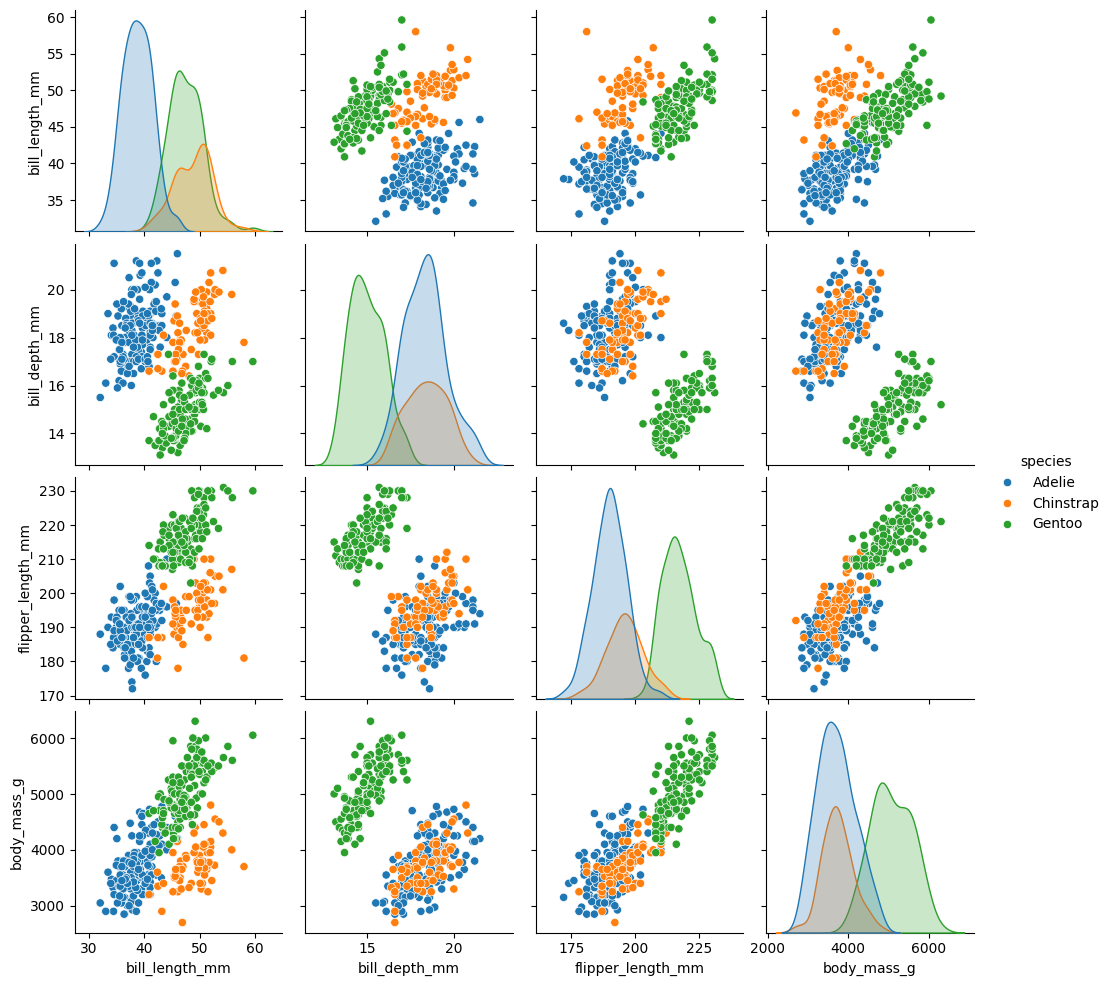

In [32]:
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

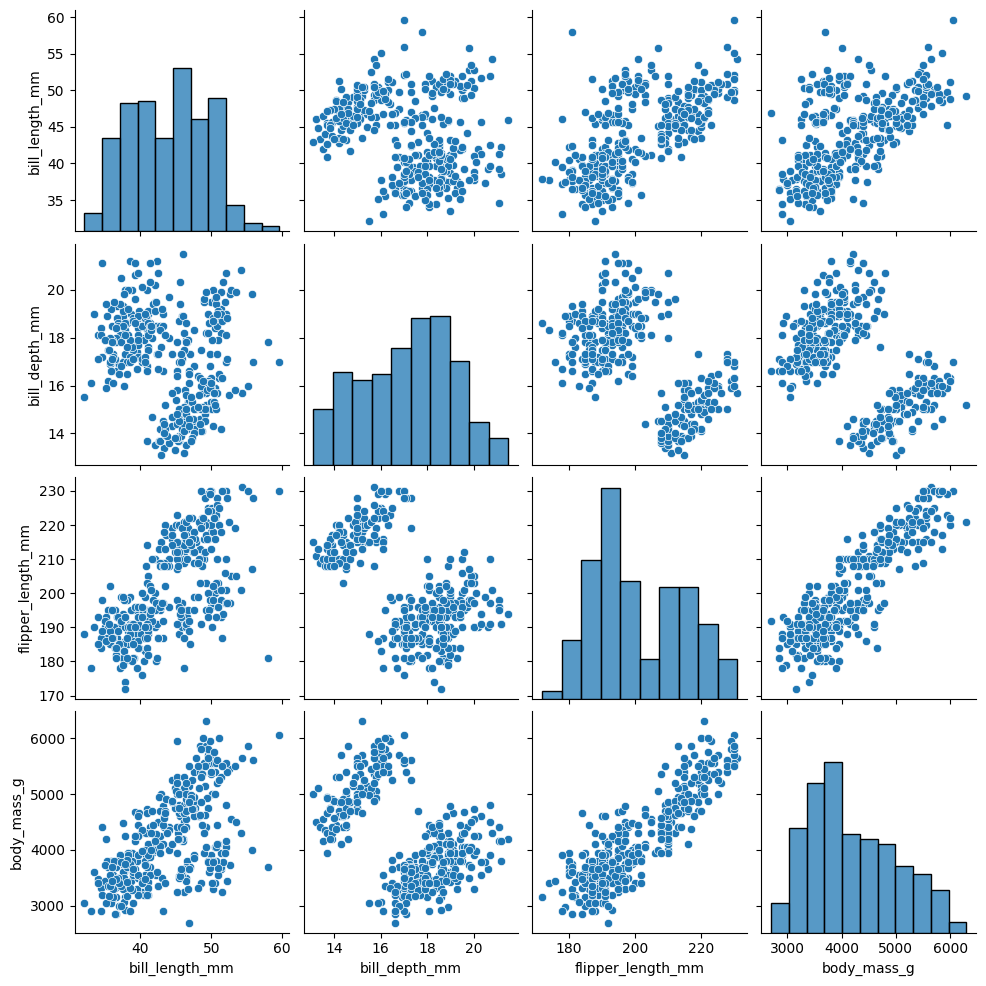

In [33]:
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)

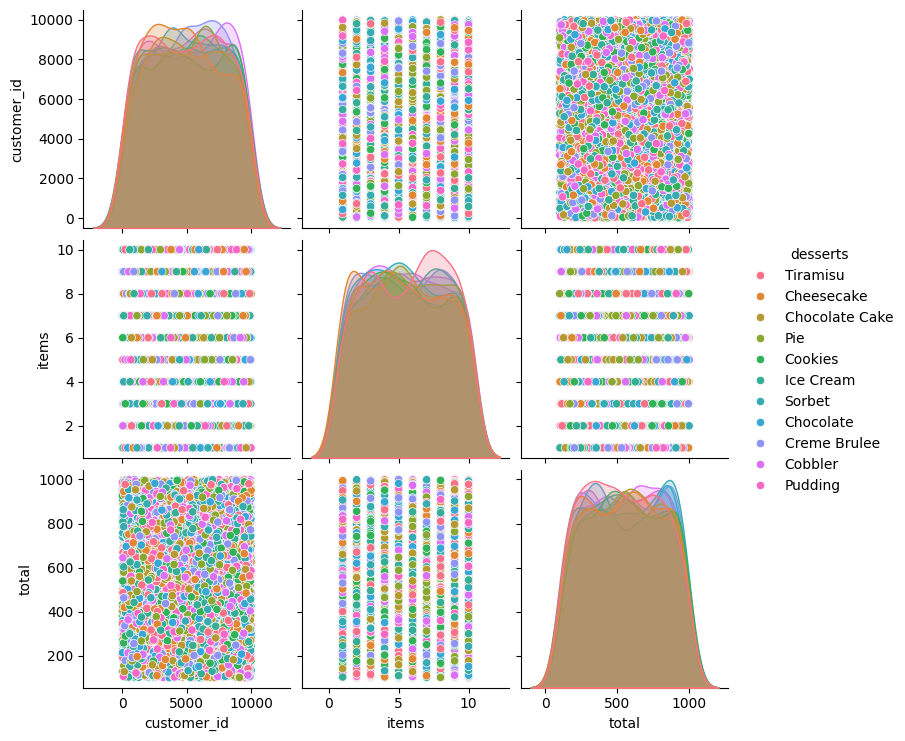

In [51]:
sns.pairplot(orders_df, hue="desserts")

In [55]:
orders_df

order_id  customer_id  items      aperitifs  \
0     f1d6b4c4-0f9f-4ba6-8d5d-f7e4ef7cd9a0         2652      7  Aperol Spritz   
1     7b8a732e-85a0-4fa2-b282-a2d232ee182e         1756      3         Sherry   
2     1eab436d-2acb-4bc8-b849-fbce859ffd8a         2989      5        Bellini   
3     d6313392-8901-42f6-bf8a-4805fe816a46         9903      3         Sherry   
4     f73f8c45-28c2-473f-a3ba-e65ed5890ac6         8627      2           Port   
...                                    ...          ...    ...            ...   
9995  bc3dd6ac-88e3-4978-8364-c047fcf44db2         5355      2           Port   
9996  7115ef6e-f8ab-4847-856a-3463d98618d5         4452      7           Port   
9997  b03408a5-e879-420d-b3dd-2b0efa1bee17         2982      6           Port   
9998  8d611f13-8886-48a1-9805-30beeab154d9         5106      4       Vermouth   
9999  8cd6ca0b-6918-487f-87f7-0426992b6418         7570      5      Champagne   

        appetizers     entrees        desserts   total  
0             Pate        Pork        Tiramisu  751.87  
1             Pate       Pasta      Cheesecake  156.43  
2             Pate     Lobster  Chocolate Cake  364.13  
3            Salad       Pizza      Cheesecake  805.62  
4             Pate     Lobster             Pie  638.43  
...            ...         ...             ...     ...  
9995       Oysters  Vegetarian         Cookies  466.83  
9996      Escargot     Lobster             Pie  311.93  
9997     Foie Gras  Vegetarian       Ice Cream  315.54  
9998      Crudites       Pasta          Sorbet  131.74  
9999  Cheese Plate        Fish    Creme Brulee  916.85  

[10000 rows x 8 columns]

In [61]:
orders_desserts_df = pd.read_csv("orders.csv") 



In [64]:
orders_desserts_df = orders_desserts_df[orders_desserts_df.desserts == "Cookies"]

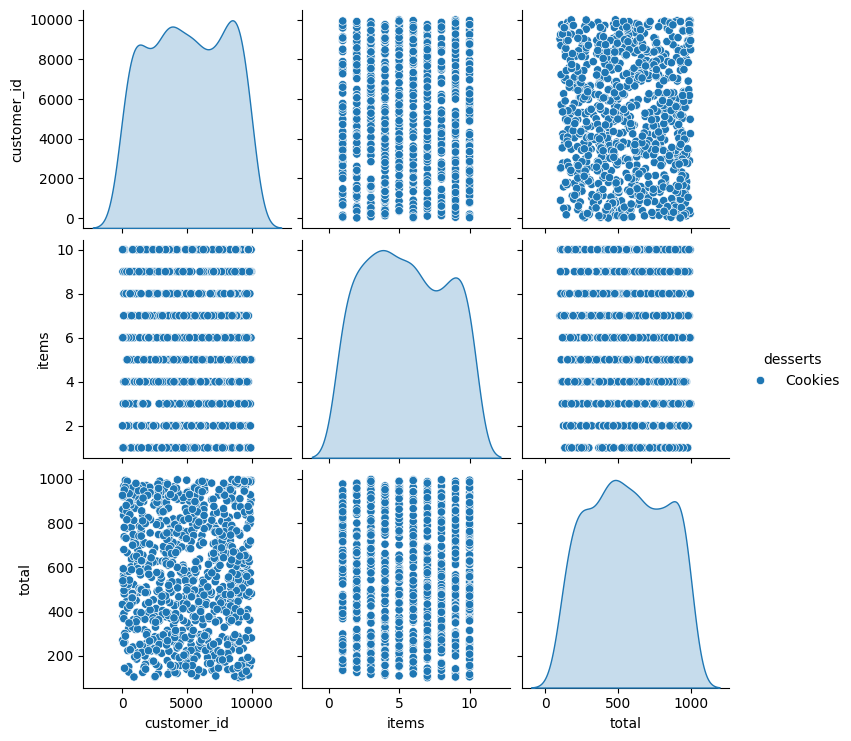

In [65]:
sns.pairplot(orders_desserts_df, hue="desserts")

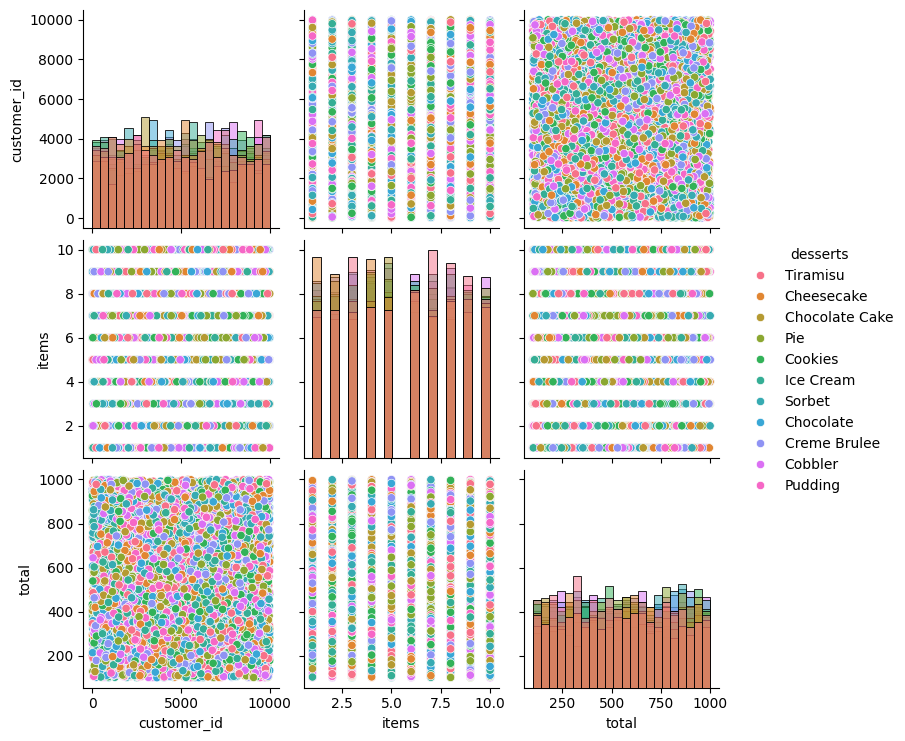

In [38]:
sns.pairplot(orders_df, hue="desserts", diag_kind="hist")

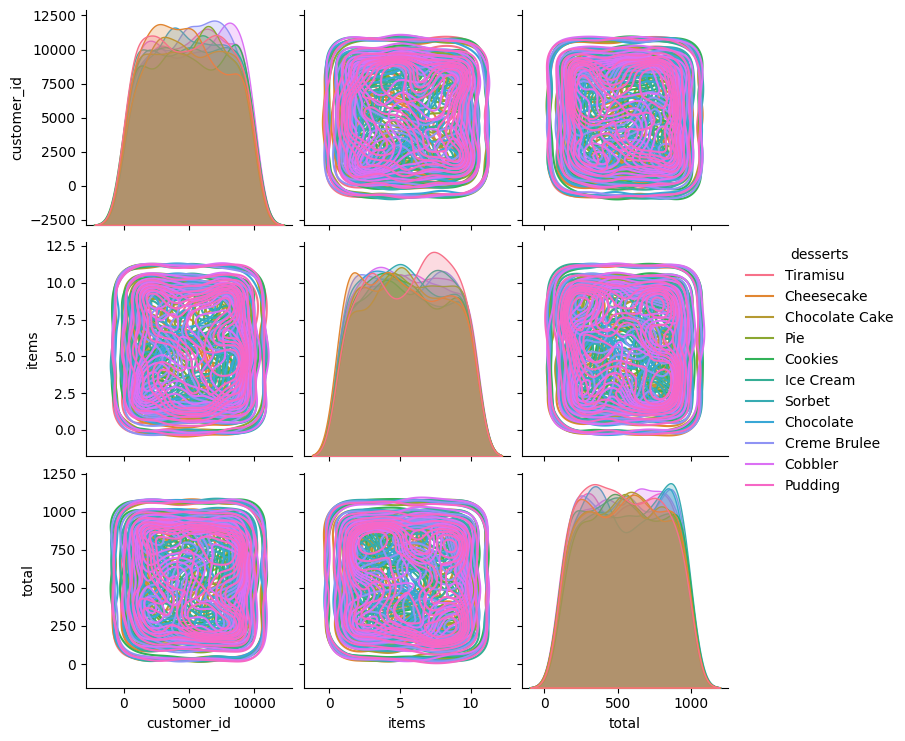

In [40]:

sns.pairplot(orders_df, hue="desserts", kind="kde")

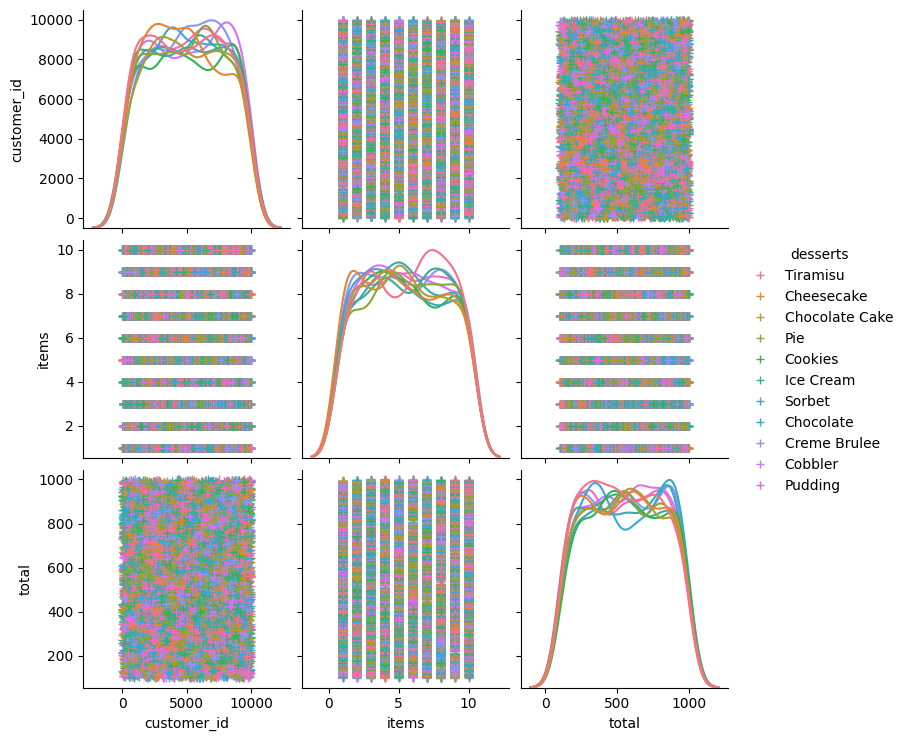

In [42]:
sns.pairplot(
    orders_df, hue="desserts",
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

In [26]:
print(total_spent_outliers)

      customer_id  total_orders  total_items  total_spent
5            4063             5            6       958.01
8            9638             6           14       965.61
21           7204            10           12       110.08
28           6161             5           17       104.40
31           2171             1           20       956.62
...           ...           ...          ...          ...
9972          582             8            9       108.54
9973         9948             6            7       963.94
9987         8480             1            8       948.42
9997         5168             7            8       137.52
9998         3722             5            1       105.75

[1325 rows x 4 columns]


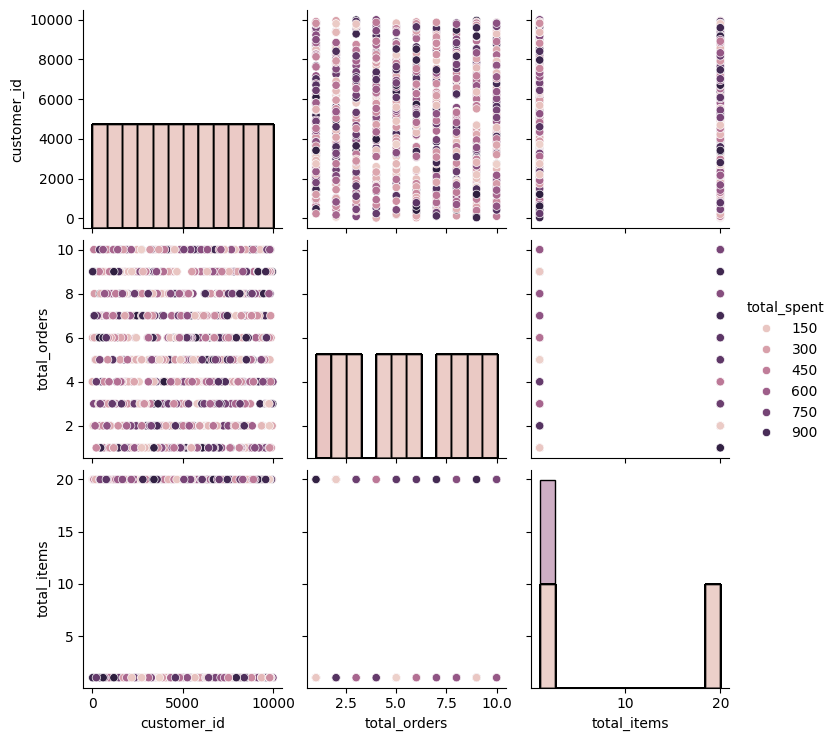

In [37]:
sns.pairplot(total_items_outliers, hue="total_spent", diag_kind="hist")

In [43]:
all_merged_data

customer_id_x  total_orders  total_items  total_spent  \
0              8037             5           20       300.39   
1              4755            10           12       649.12   
2              2651            10            9       794.28   
3              2651            10            9       794.28   
4              4063             5            6       958.01   
...             ...           ...          ...          ...   
6297           5615             8           16       202.09   
6298           2103             8           15       514.00   
6299           2103             8           15       514.00   
6300           3722             5            1       105.75   
6301           2911             2            8       918.60   

                            address               city credit_card_expires  \
0         621 Chavez Ramp Suite 938    West Deniseport               06/31   
1               496 Margaret Shoals       Smithborough               04/33   
2        0807 Logan Fords Suite 355      Contrerasside               10/25   
3        0807 Logan Fords Suite 355      Contrerasside               10/25   
4       9290 Krista Cliff Suite 506     West Kaylastad               09/27   
...                             ...                ...                 ...   
6297    909 David Mission Suite 354  South Christopher               06/25   
6298               45292 Amy Stream       Martinezland               11/30   
6299               45292 Amy Stream       Martinezland               11/30   
6300            35316 Becky Terrace        Port Donald               04/24   
6301  6101 Thompson Ridges Apt. 896       Marissamouth               05/25   

       credit_card_number         credit_card_provider  \
0        2269172571677458  Diners Club / Carte Blanche   
1        4234465830748237                   Mastercard   
2           4985681645741                     Discover   
3           4985681645741                     Discover   
4         371450682302318                      Maestro   
...                   ...                          ...   
6297      213105167494301                VISA 16 digit   
6298     4011981090951526                 JCB 16 digit   
6299     4011981090951526                 JCB 16 digit   
6300     6595168672629675                 JCB 16 digit   
6301  4999092953838318200  Diners Club / Carte Blanche   

     credit_card_security_code  ...          state zip_code  \
0                          338  ...       New York    59237   
1                          497  ...           Iowa    42755   
2                          927  ...    Connecticut    64282   
3                          927  ...    Connecticut    64282   
4                          577  ...  Massachusetts    39877   
...                        ...  ...            ...      ...   
6297                       252  ...         Kansas    10865   
6298                       849  ...        Vermont    65616   
6299                       849  ...        Vermont    65616   
6300                       113  ...         Nevada    97426   
6301                       810  ...         Nevada    22202   

                                  order_id customer_id items  \
0     d69f5665-4fbd-439d-8a69-78cc8ee5e6b6        8037     6   
1     1e2d2b43-e6e8-4758-aa99-60499228cc1c        4755     4   
2     4e086f2b-f8ba-47b8-8220-d4738f1c688b        2651     5   
3     4b714d7f-0ac1-4d86-b3f8-5258400ecb91        2651     9   
4     e7896614-f21d-489b-b8bd-95ef7c06b150        4063     6   
...                                    ...         ...   ...   
6297  d5eba473-c87f-4e82-8142-0d2af8f56474        5615     2   
6298  489b6b06-6926-4e91-8b38-0f40ebdacdca        2103     4   
6299  4ef23b06-aa7c-42e0-9bd3-4757a29a368d        2103     5   
6300  d0800680-98ba-41f7-8b26-3cac36b967dd        3722     5   
6301  074e04e7-885f-4011-8cd0-e1efd403479e        2911     5   

             aperitifs    appetizers     entrees      desserts   total  
0           Kir 

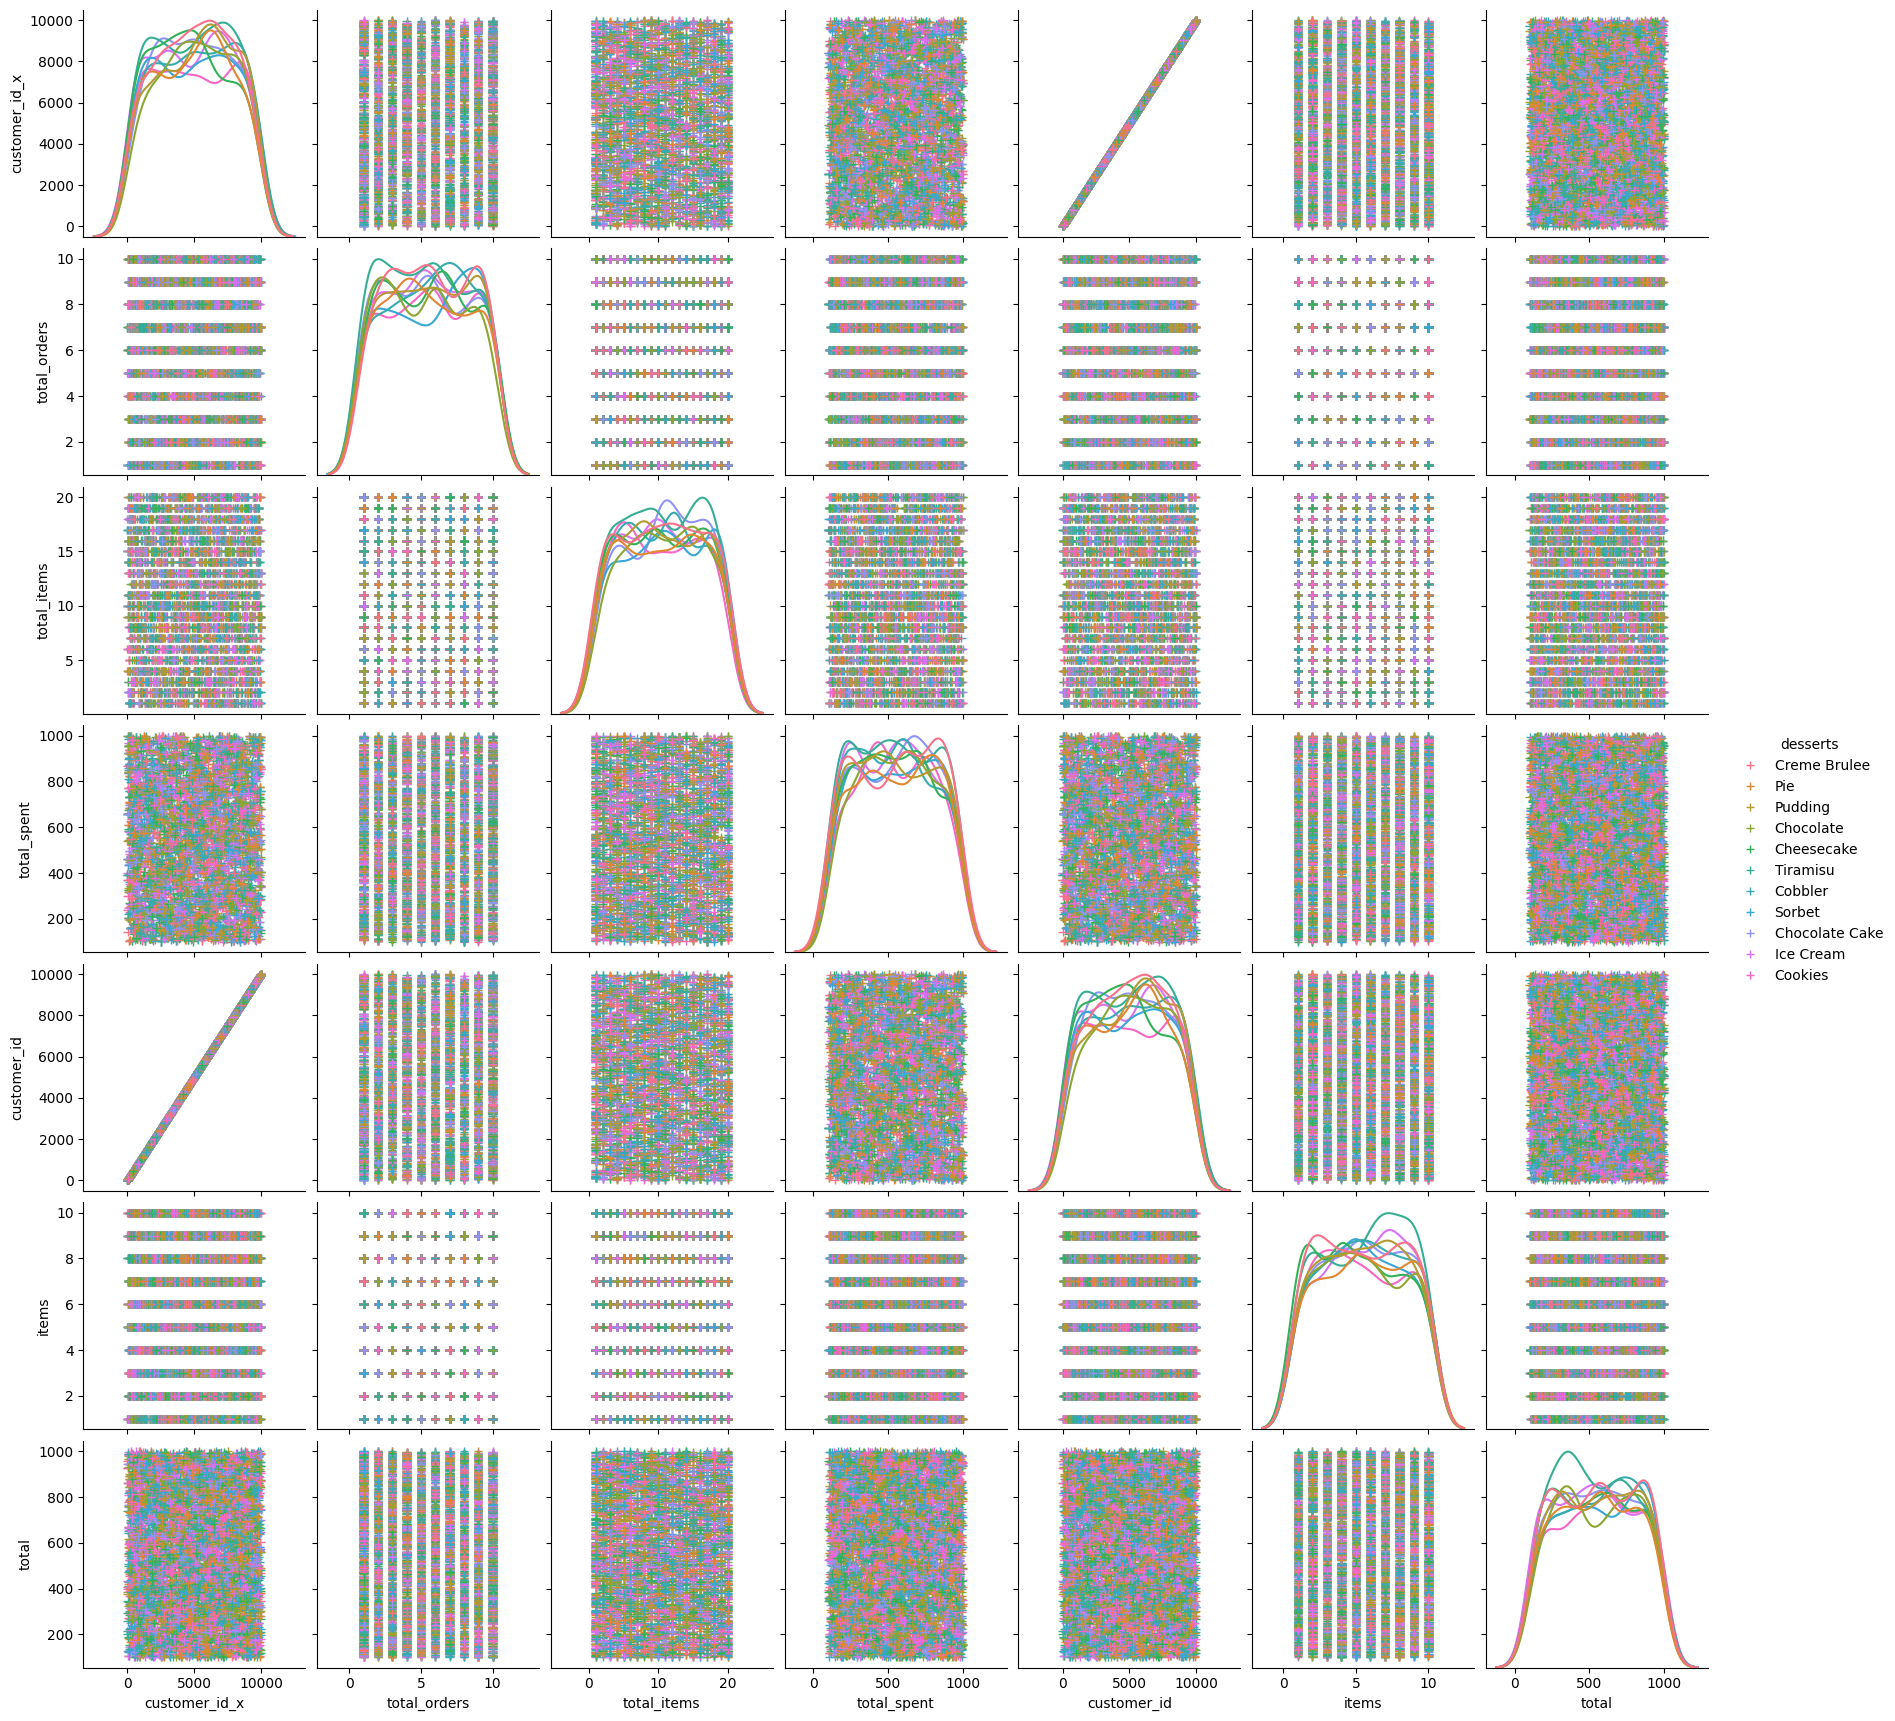

In [44]:
sns.pairplot(
    all_merged_data, hue="desserts",
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

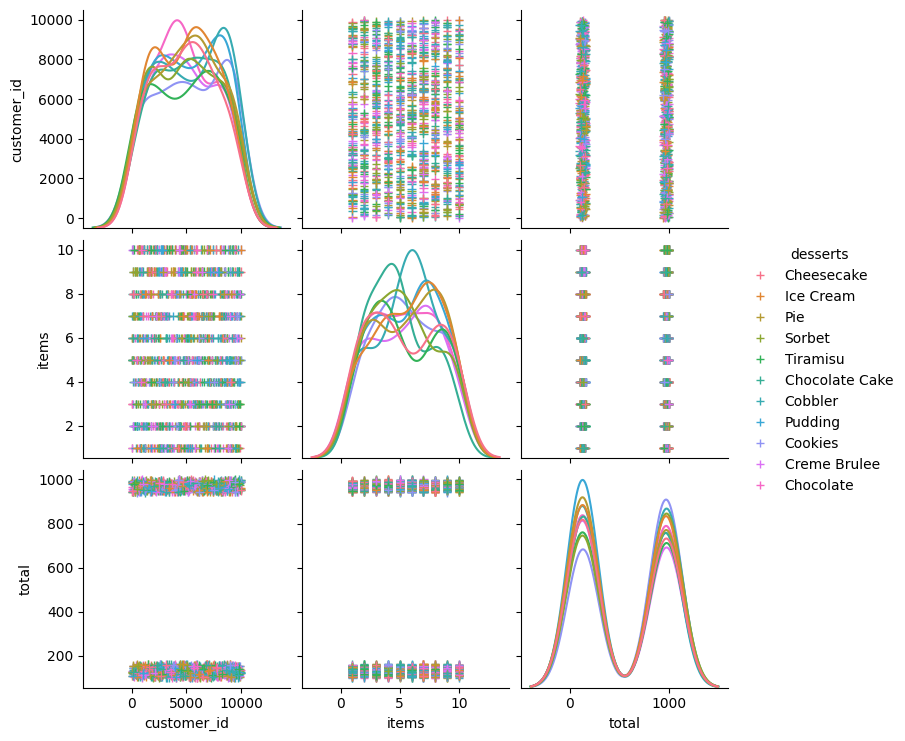

In [47]:
sns.pairplot(
    
orders_df_outliers, hue="desserts",
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)
